In [56]:
# import the libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# data preprocessing
# read in data 
PRSA_df = pd.read_csv('./data/PRSA_data.csv')

# one-hot coding on cbwd
PRSA_df =pd.get_dummies(PRSA_df,columns=['cbwd'])

# season
def season_divide(x):
    if x in range(3,6):
        return 'Spring'
    elif x in range(6,9):
        return 'Summer'
    elif x in range(9,12):
        return 'Autumn'
    else:
        return 'Winter'

PRSA_df['season'] = PRSA_df['month'].apply(season_divide)

# delete the nan statistics
no_nan_df = PRSA_df.drop(index=PRSA_df[PRSA_df['pm2.5'].isnull()].index).reset_index(drop=True)

# grade on pm2.5
no_nan_df['grade'] = no_nan_df['pm2.5'].apply(lambda x: 'low' if x<=35 else ('mid' if x<=150 else 'high'))

In [58]:
# get the train set and test set
yy = 2010
mm = 1
dd = 7
day_of_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
test_df = pd.DataFrame()
while yy <= 2014:
    test_df = test_df.append(
        no_nan_df[(no_nan_df['year'] == yy) & (no_nan_df['month'] == mm) & (no_nan_df['day'] == dd)]
    )
    dd += 7
    if dd > day_of_month[mm - 1]:
        if yy == 2012 and mm == 2:
            dd -= 29
        dd -= day_of_month[mm - 1]
        mm += 1
    if mm > 12:
        mm -= 12
        yy += 1

train_df = no_nan_df.append(test_df).append(test_df)
train_df = train_df.drop_duplicates(keep=False)

X_train, X_test = train_df.iloc[:, [6, 15]], test_df.iloc[:, [6, 15]]
y_train, y_test = train_df.iloc[:, 5], test_df.iloc[:, 5]

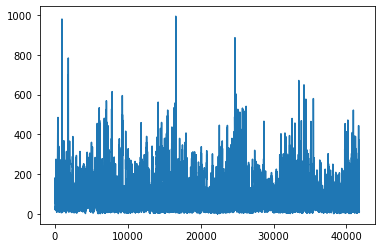

In [59]:
plt.plot(no_nan_df['pm2.5'], label='PM2.5')

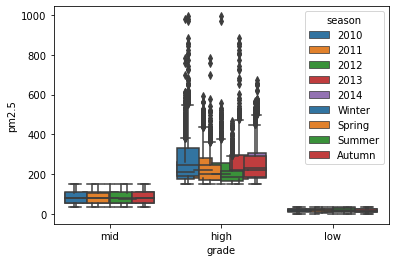

In [60]:
# data visulization
b1 = sns.boxplot(x='grade',y='pm2.5',data=no_nan_df,hue='year')
b2 = sns.boxplot(x='grade',y='pm2.5',data=no_nan_df,hue='season')

In [61]:
# Regression model training and test
# linear regression
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = lr.score(X_test, y_test)
mse_lr = mean_squared_error(y_true=y_test, y_pred=y_pred_lr)

# ridge regression
rr = Ridge().fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
r2_rr = rr.score(X_test, y_test)
mse_rr = mean_squared_error(y_true=y_test, y_pred=y_pred_rr)

# lasso regression
las = Lasso().fit(X_train, y_train)
y_pred_las = las.predict(X_test)
r2_las = las.score(X_test, y_test)
mse_las = mean_squared_error(y_true=y_test, y_pred=y_pred_las)

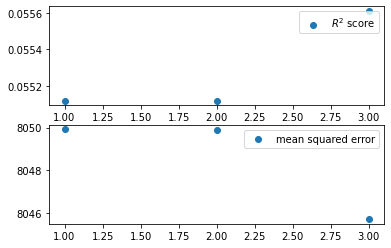

In [62]:
# plot to compare
fig, ax = plt.subplots(2)
ax[0].scatter([1, 2, 3], [r2_lr, r2_rr, r2_las], label='$R^2$ score')
ax[0].legend(loc='best')
ax[1].scatter([1, 2, 3], [mse_lr, mse_rr, mse_las], label='mean squared error')
ax[1].legend(loc='best')

In [63]:
from sklearn.svm import SVC

In [64]:
# SVM 支持向量机
clf1 = SVC(kernel='rbf')
clf1.fit(X_train, y_train)
score1 = clf1.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
AdaBoost = AdaBoostRegressor(n_estimators=100)
AdaBoost.fit(X_train, y_train)
r2_AdaBoost = AdaBoost.score(X_test, y_test)
r2_AdaBoost

0.9899496493453955

In [ ]:
RandomForest = RandomForestRegressor(n_estimators=20)
RandomForest.fit(X_train,y_train)
r2_RandomForest = RandomForest.score(X_test,y_test)
r2_RandomForest

0.9999846048311082

In [ ]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 初始化基模型
lr = LinearRegression()
svr_lin = SVR(kernel='linear', gamma='auto')
svr_rbf = SVR(kernel='rbf', gamma='auto')
ridge = Ridge(random_state=2019)
models = [lr, svr_lin, svr_rbf, ridge]

print('base model')
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("loss is {}".format(mean_squared_error(y_test, pred)))
sclf = StackingRegressor(regressors=models, meta_regressor=ridge)
# 训练回归器
sclf.fit(X_train, y_train)
pred = sclf.predict(X_test)

print('stacking model')
print("loss is {}".format(mean_squared_error(y_test, pred)))
plt.scatter(np.arange(len(pred)), pred)
plt.plot(np.arange(len(y_test)), y_test)
plt.show()

base model


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
sclf.score(X_test,y_test)

0.9999999999743258